In [26]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [27]:
path = './input/AirPassengers.csv'
df = pd.read_csv(path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
df.columns = ['Date', 'Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


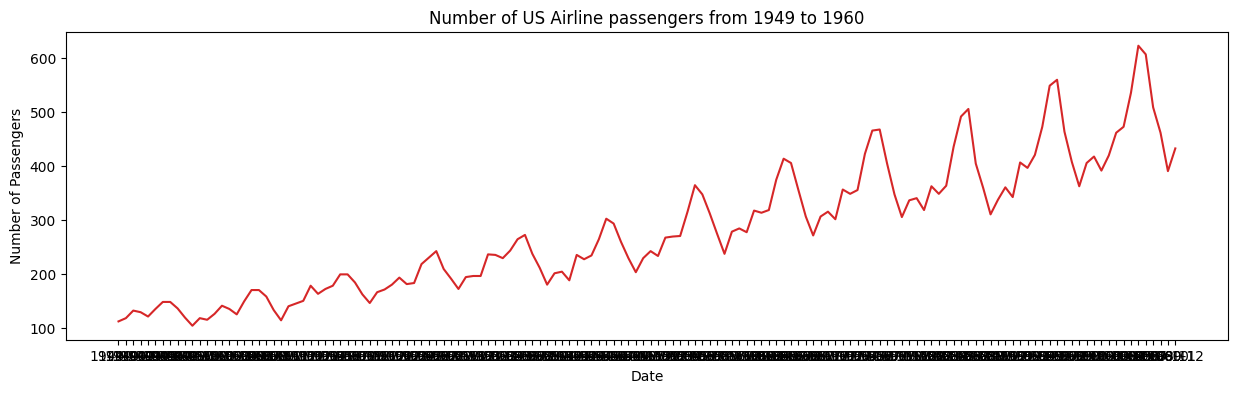

In [29]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(df['Date'], df['Number of Passengers'], color='tab:red')
plt.gca().set(title='Number of US Airline passengers from 1949 to 1960', xlabel='Date', ylabel='Number of Passengers')
plt.show()

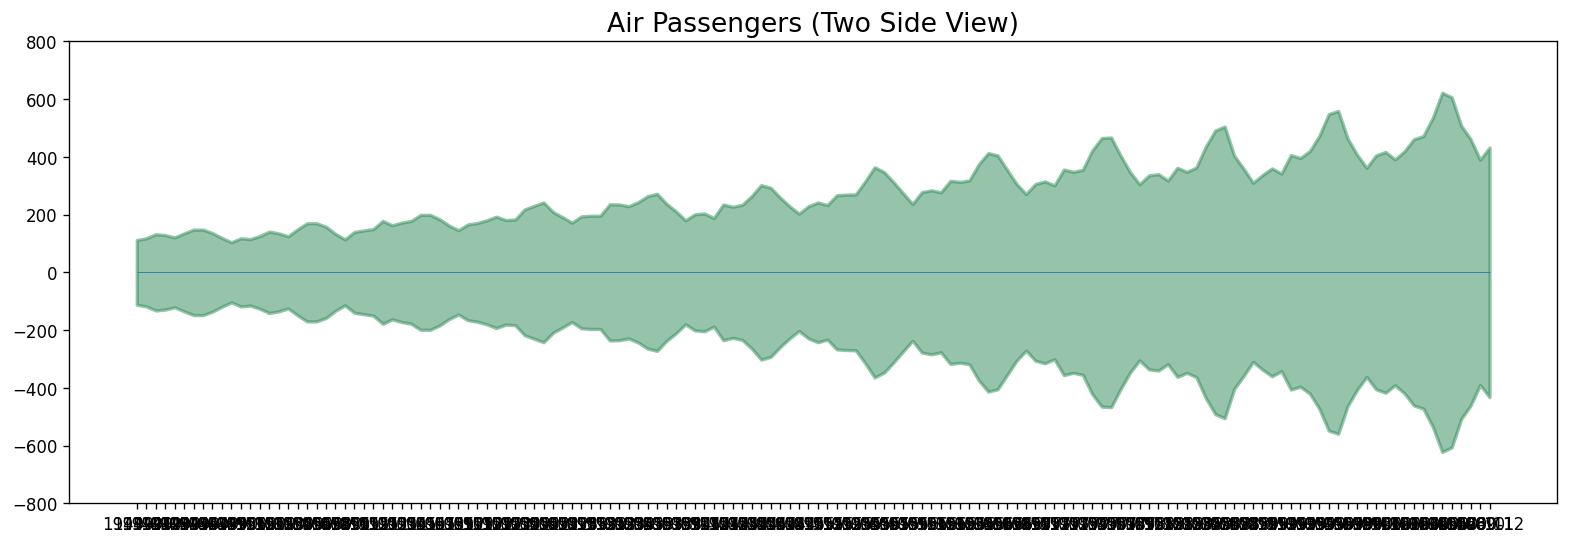

In [30]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

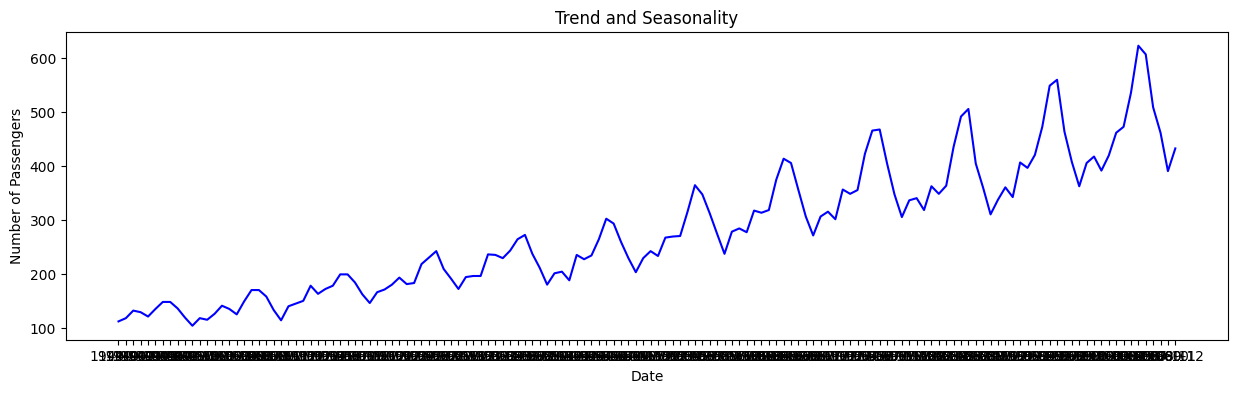

In [31]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(df['Date'], df['Number of Passengers'], color='blue')
plt.gca().set(title='Trend and Seasonality', xlabel='Date', ylabel='Number of Passengers')
plt.show()

/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_44896/157302153.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_44896/157302153.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


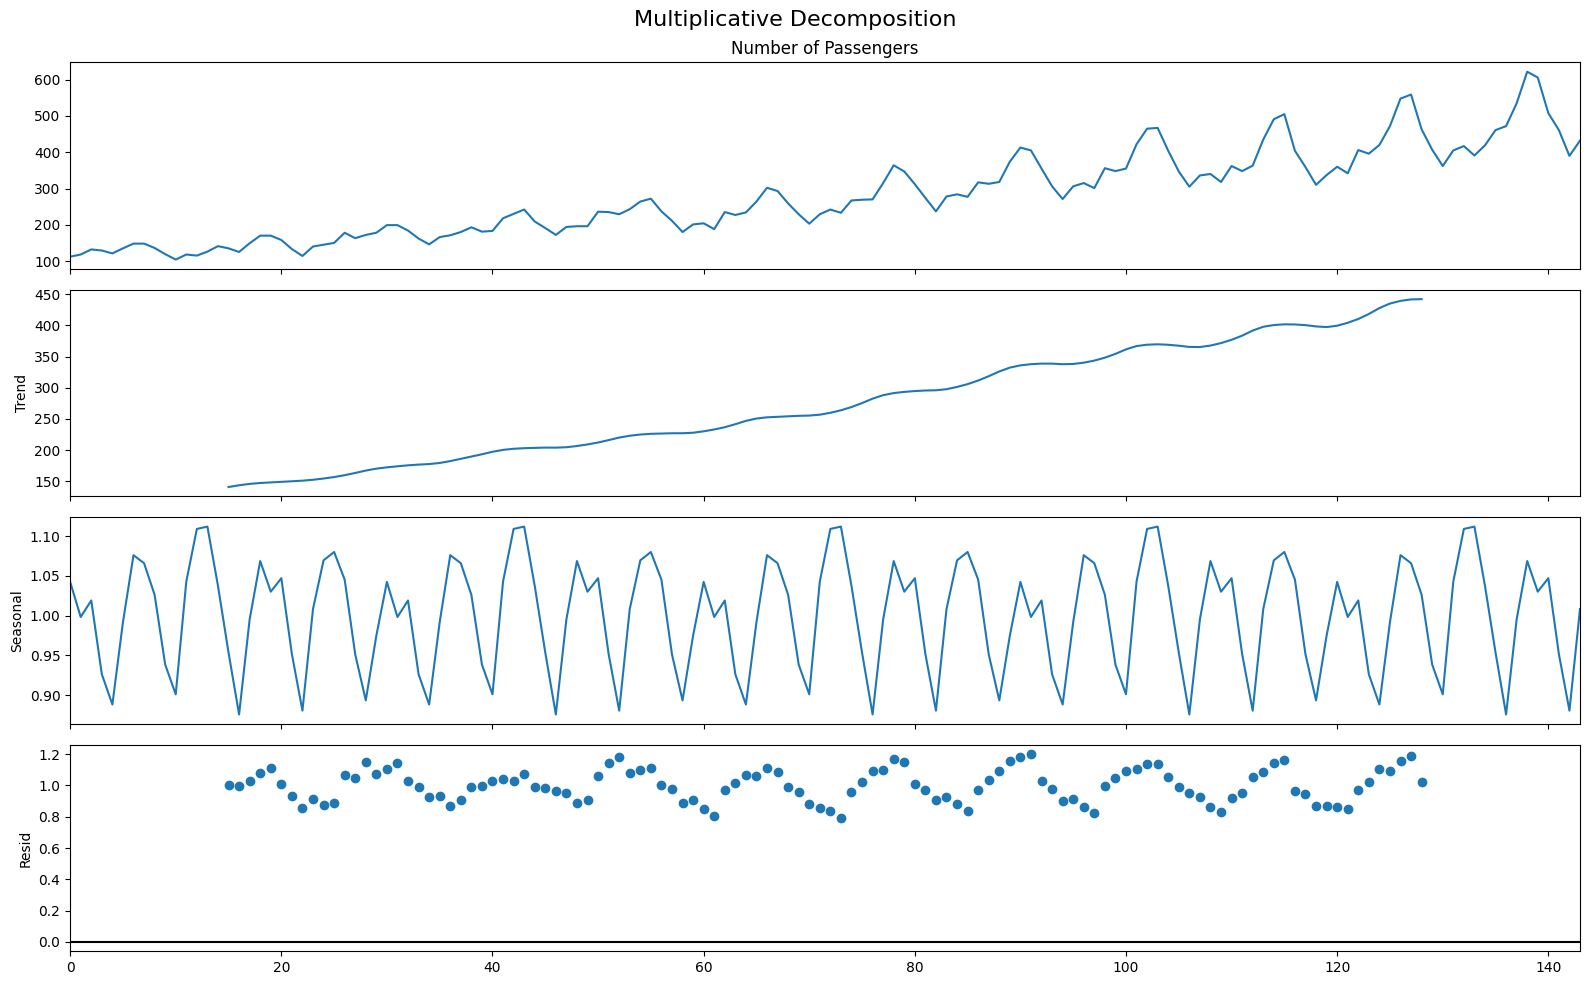

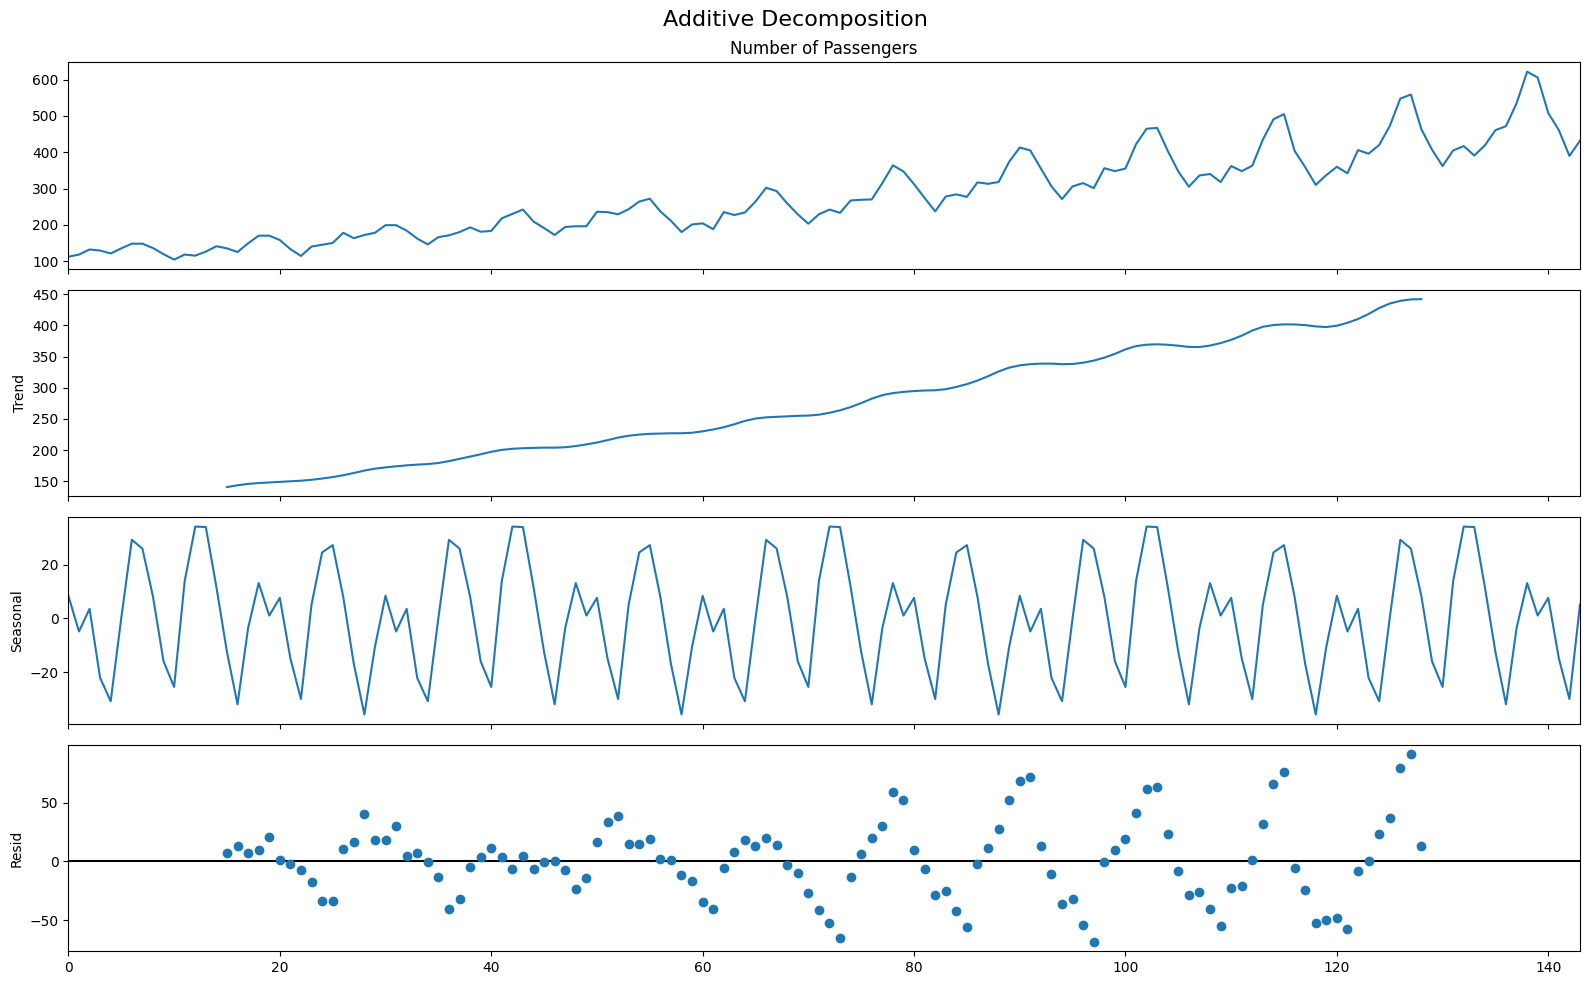

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

plt.rcParams.update({'figure.figsize': (16, 10)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout()

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout()

plt.show()

<Axes: title={'center': 'Random White Noise'}>

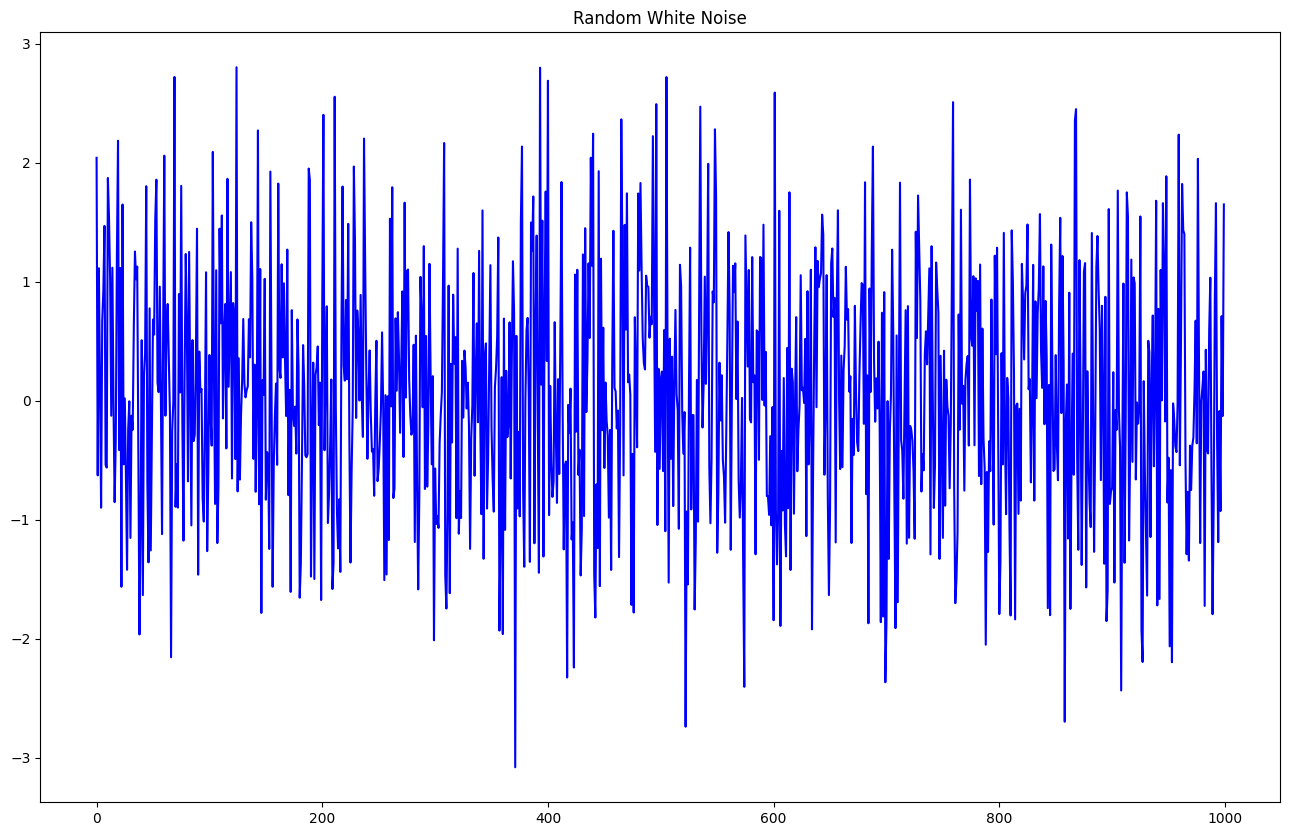

In [33]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

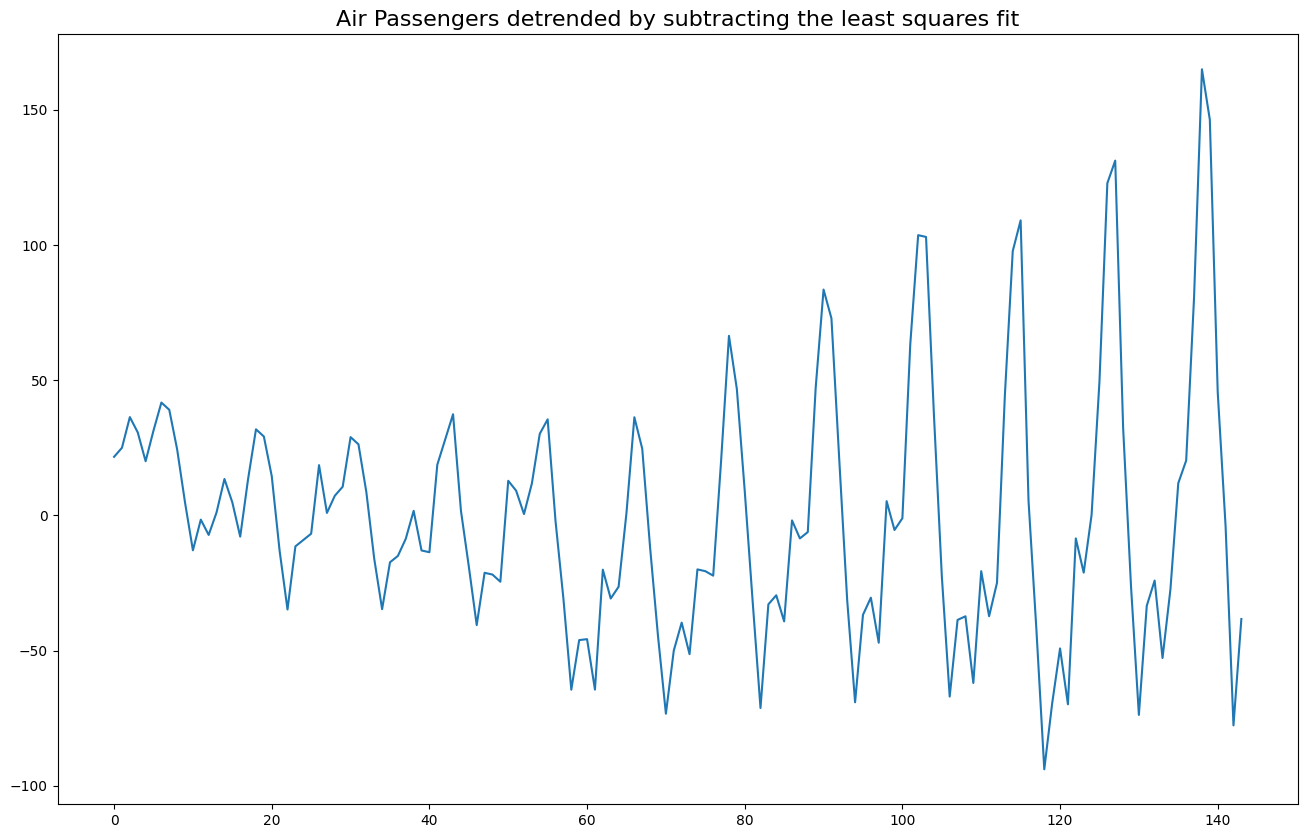

In [34]:
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

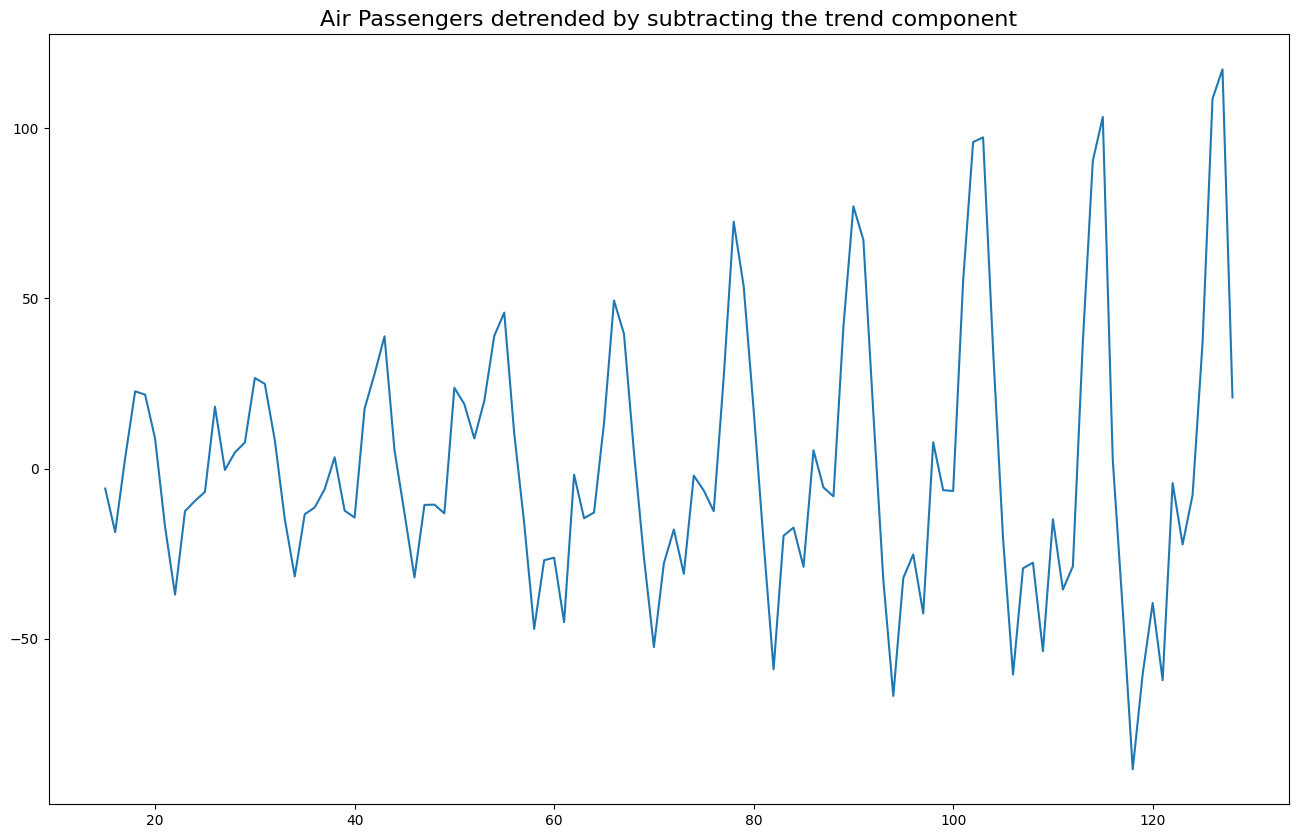

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

[]

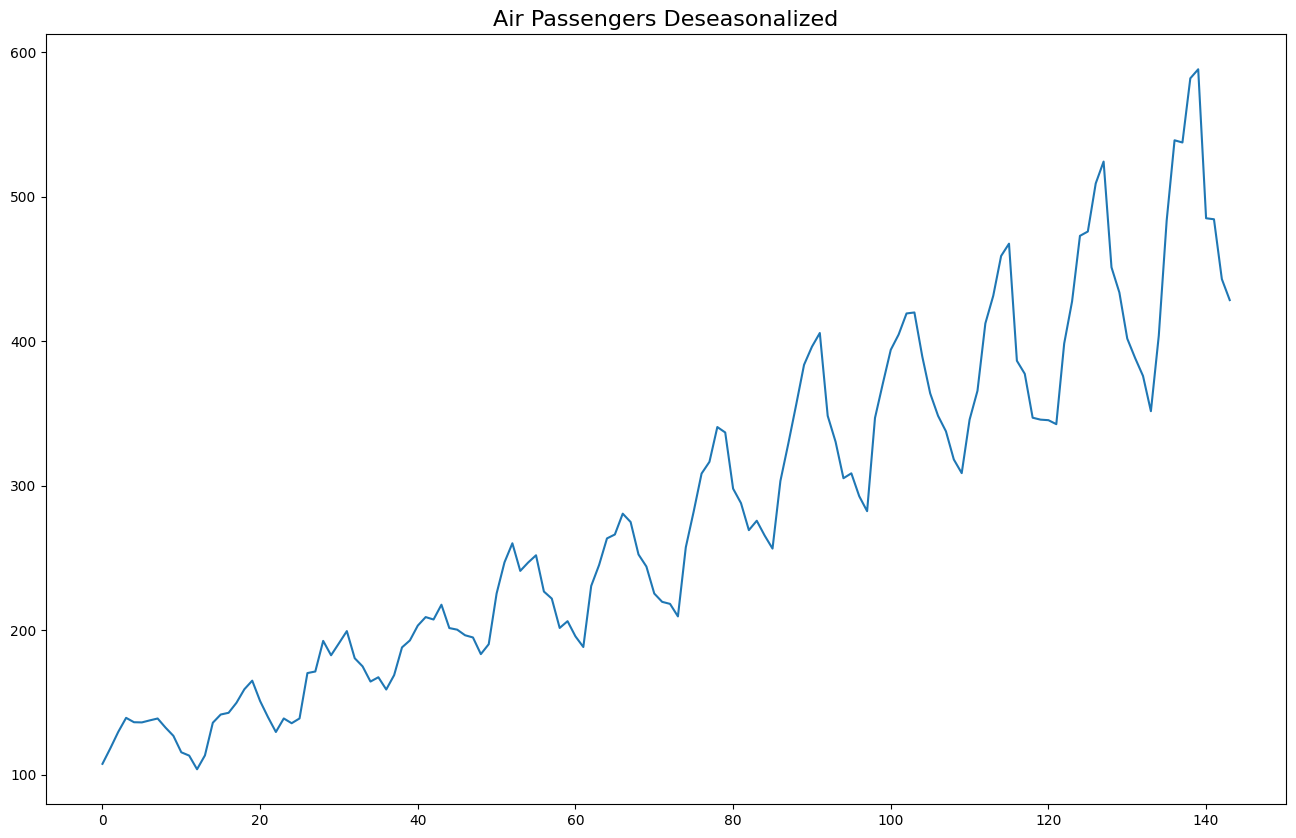

In [36]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

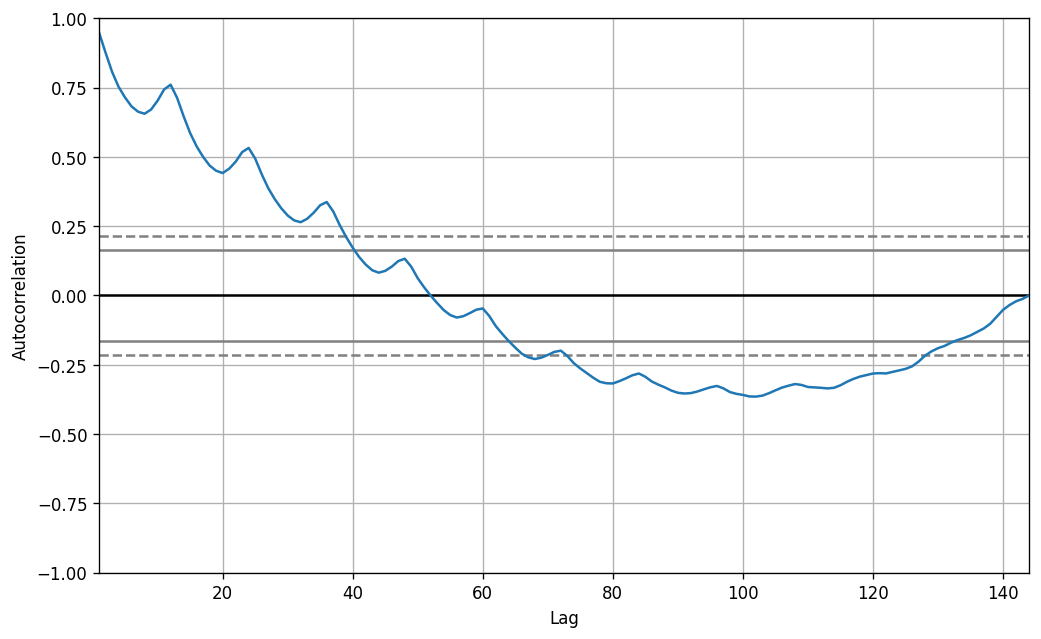

In [37]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

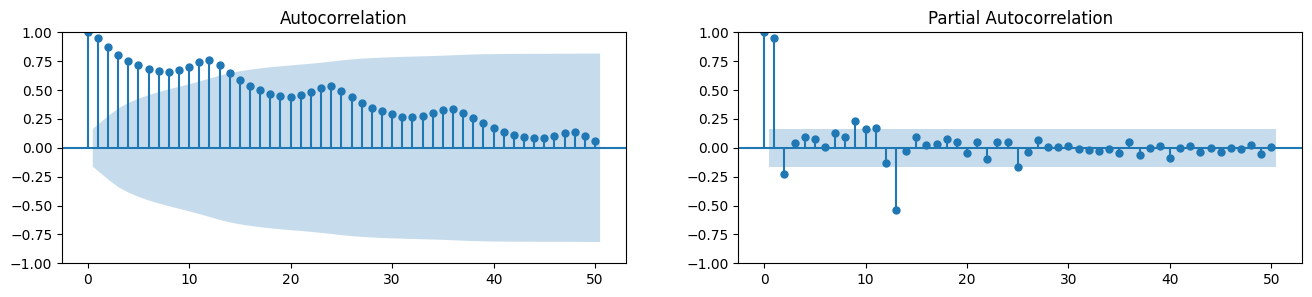

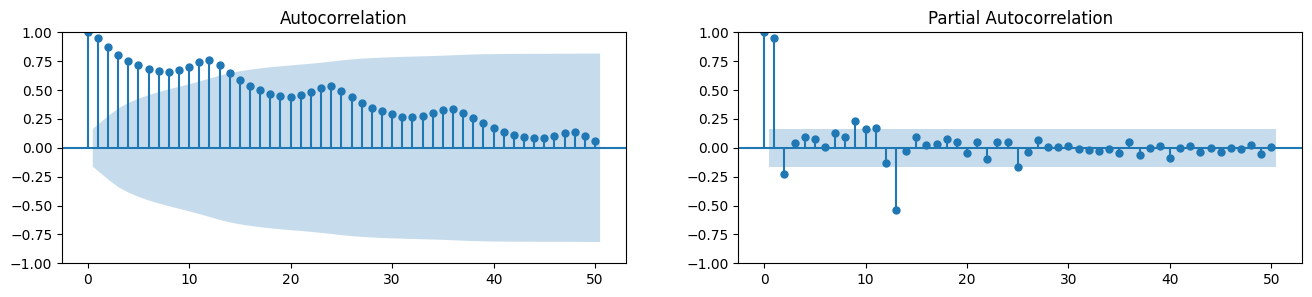

In [38]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

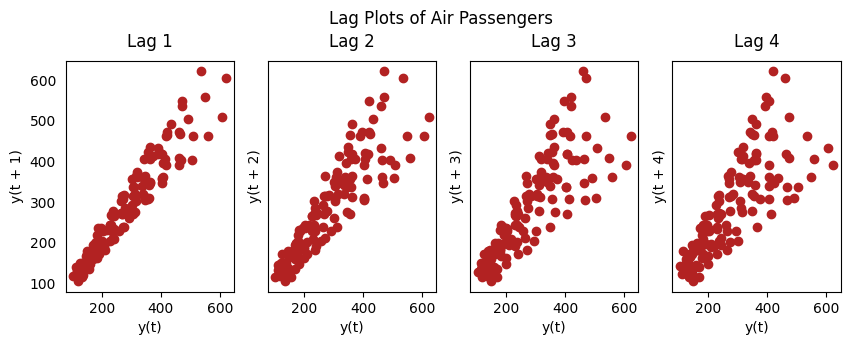

In [39]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()